In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [5]:
library(ggplot2)
library(dplyr)


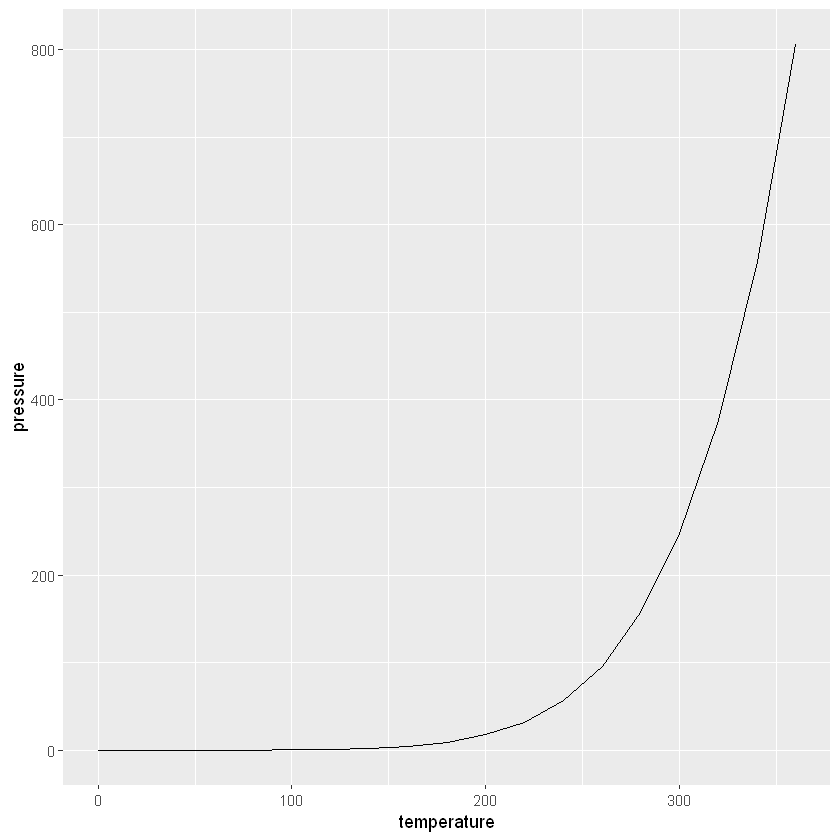

In [12]:
ggplot(data = pressure, aes(x=temperature, y = pressure)) +
geom_line()

In [17]:
# select 열 선택

df_cfm_order <- inner_join(reservation_r, order_info_r, by='reserv_no')  %>% 
select(customer_id,reserv_no, visitor_cnt, cancel, order_no, item_id, sales)  %>% 
arrange(customer_id,reserv_no,item_id)

In [18]:
head(df_cfm_order)
#데이터셋 확인

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [20]:
#총 방문 고객 수, 총 매출

df_sct_graph <- df_cfm_order  %>% 
group_by(customer_id) %>% 
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

In [21]:
head(df_sct_graph)
#데이터셋 확인

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


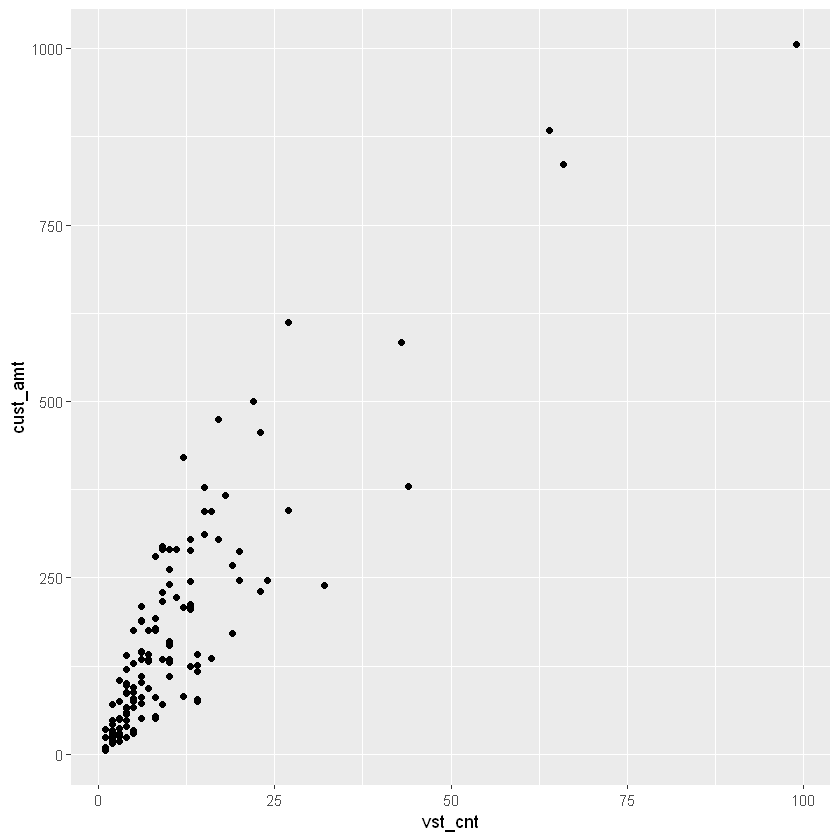

In [26]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt )) +
geom_point()

In [ ]:
# cunst_amt 500까지만 확대해서 보자. : 축 조정

Warning message:
"Removed 5 rows containing missing values (geom_point)."

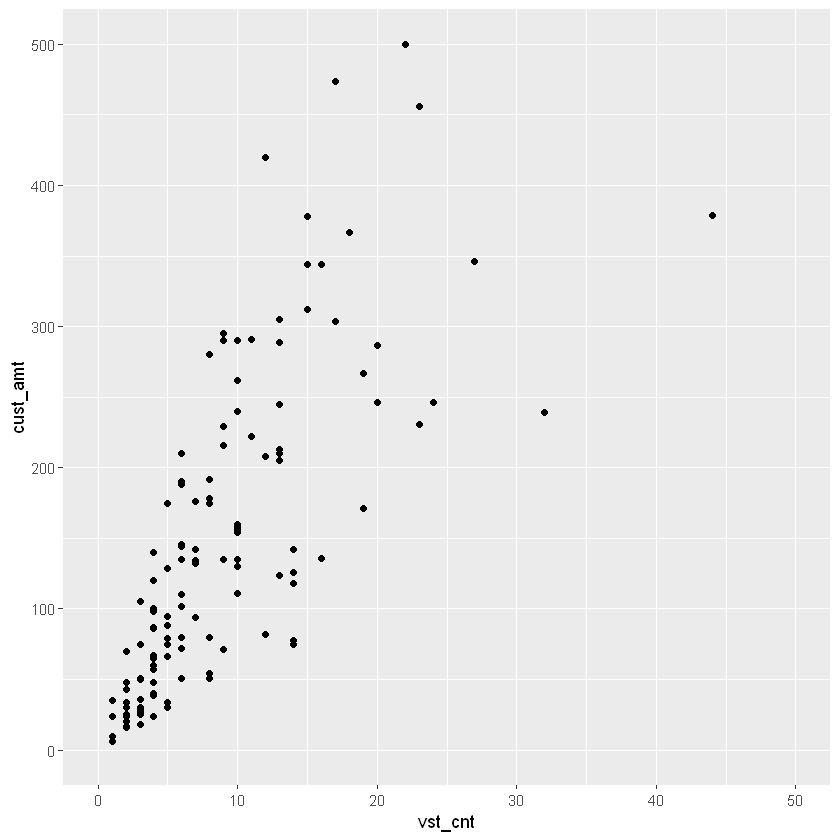

In [28]:
ggplot(data = df_sct_graph, aes(x=vst_cnt, y = cust_amt )) +
geom_point()+
xlim(0,50)+ylim(0,500)

#양의 상관관계 : 늘어날수록 늘어난다.
#경고 메세지 : 다섯개 행을 missing했습니다. -> 축 조정했기때문.

In [29]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [31]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = 'customer_id')  %>% 
select(vst_cnt, cust_amt, sex_code)

In [32]:
head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

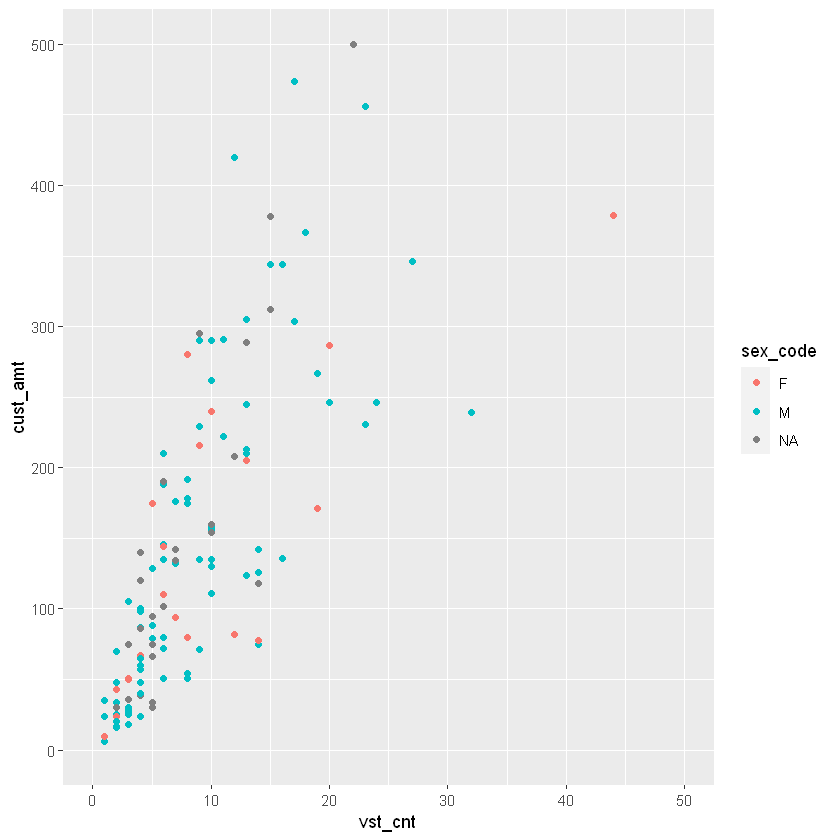

In [36]:
ggplot(data=df_sct_graph2, aes(x=vst_cnt,y=cust_amt,color=sex_code))+
geom_point()+
xlim(0,50)+ylim(0,500)

In [39]:

# 예약 완료, 주문 완료 데이터 연결
df_branch_sales_1 <- inner_join(reservation_r,order_info_r, by='reserv_no')  %>% 
select(branch,sales) %>% 
arrange(branch,sales)

In [42]:
# 지점별로 매출 합산

df_branch_sales_2 <- df_branch_sales_1  %>% 
group_by(branch) %>% 
summarise(amt=sum(sales)/10000) %>% 
arrange(desc(amt))

In [43]:
df_branch_sales_2

#데이터셋 확인

branch,amt
강남,407.4
영등포,151.6
종로,142.8
용산,136.6
서초,129.5
송파,119.0
서대문,118.0
동작,114.9
관악,110.1
노원,105.4


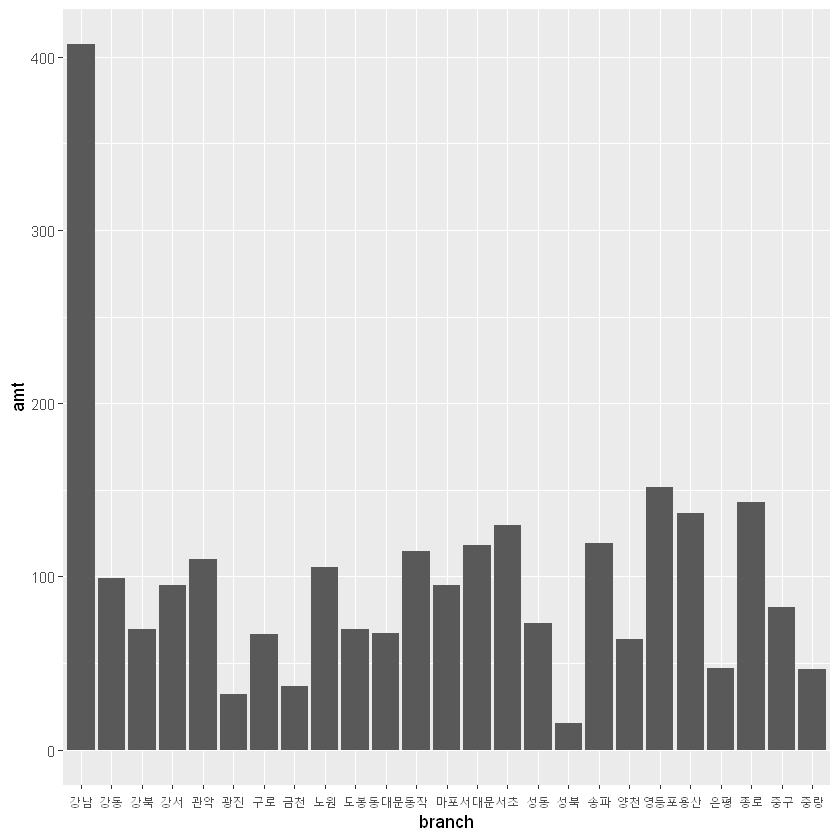

In [44]:
ggplot(df_branch_sales_2,aes(x= branch,y= amt))+ 
geom_bar(stat='identity')

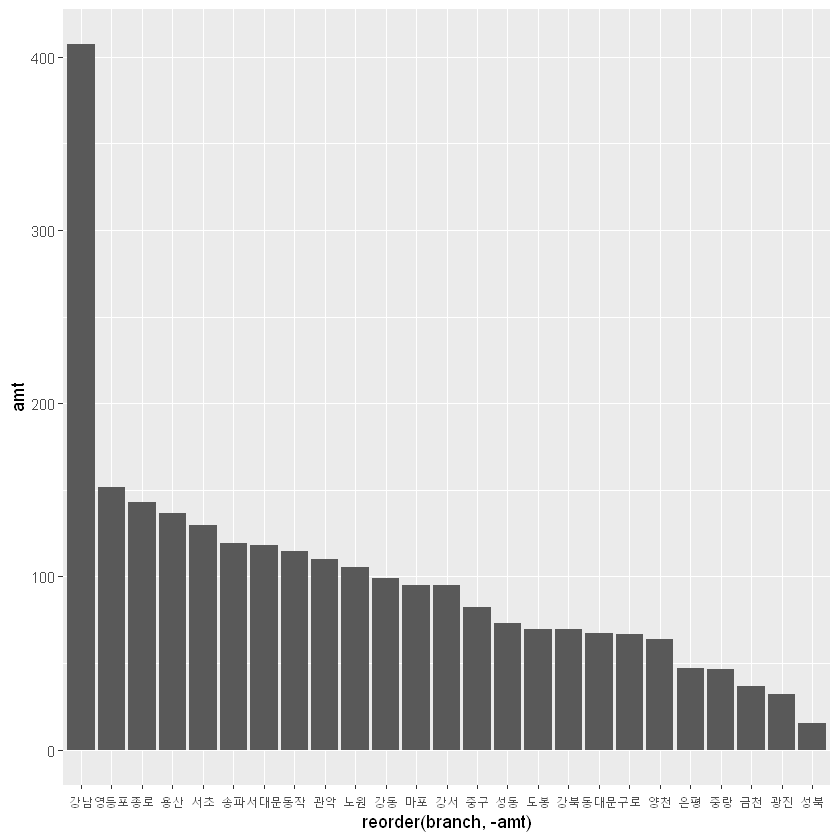

In [47]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt)) +
geom_bar(stat = "identity")

# -amt 큰 순서대로 내림차순

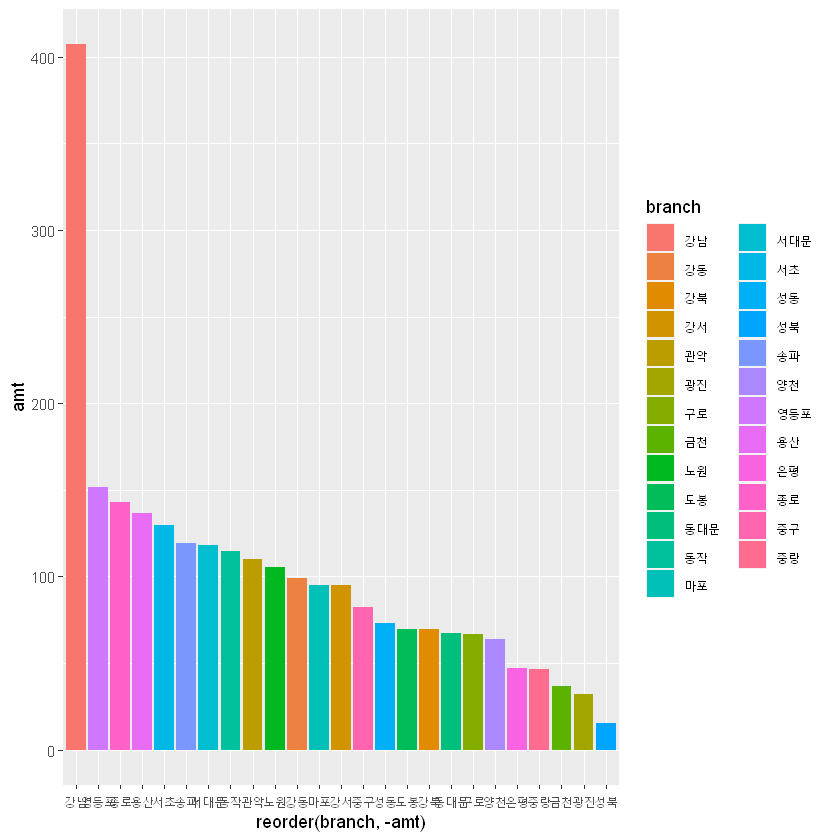

In [49]:
#자동으로 막대 그랴프에 색상 채우기
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt,fill = branch)) +
    geom_bar(stat = "identity")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

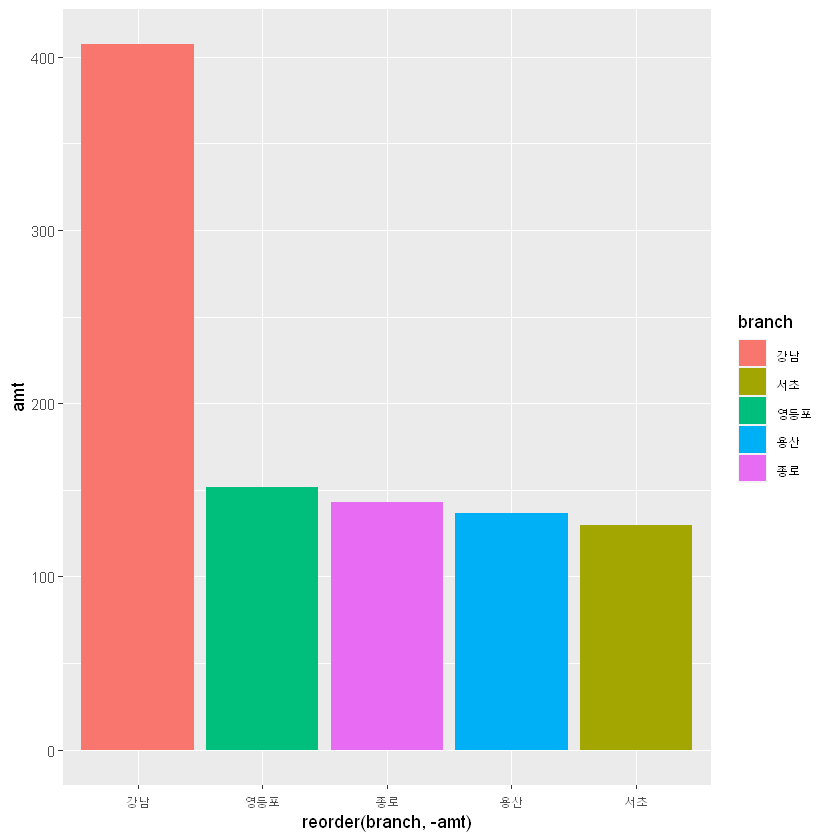

In [51]:
#원하는 것만 보자.
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt,fill = branch)) +
geom_bar(stat = "identity") +
xlim(c('강남','영등포','종로','용산','서초'))

#x축에 limit을 걸어라.

Warning message:
"Removed 20 rows containing missing values (position_stack)."

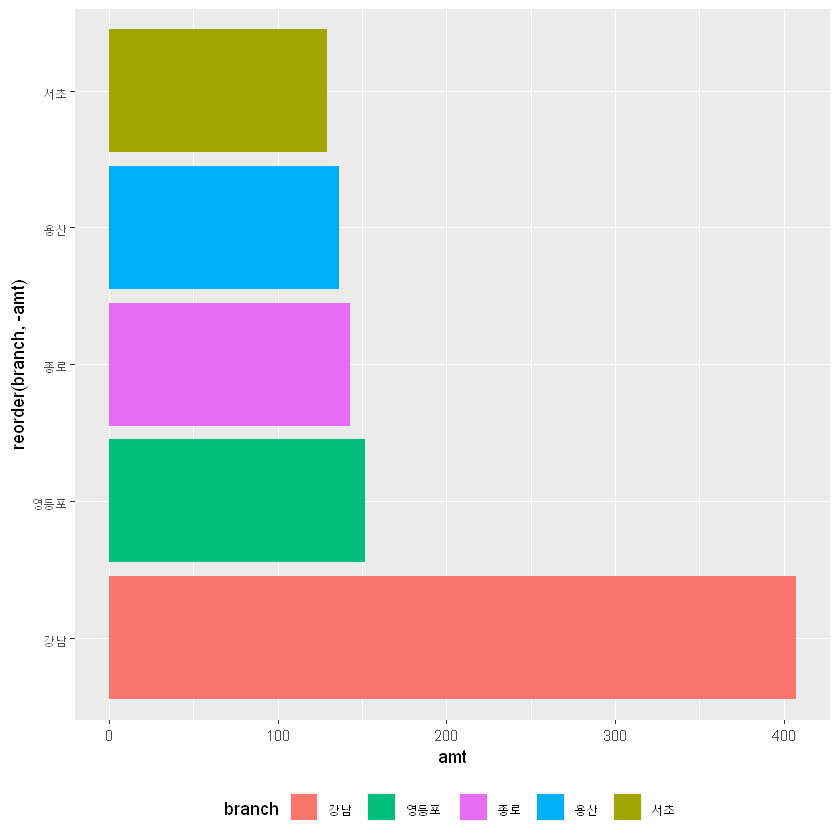

In [82]:
#가로 막대 그래프 그리기

gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt,fill = branch)) +
geom_bar(stat = "identity") +
xlim(c('강남','영등포','종로','용산','서초'))

gg <- gg + coord_flip() + #x축과 y축을 바꿈 
           theme(legend.position = 'bottom')+ # 오른쪽에 있던 범례를 bottom으로 옮김.
    scale_fill_discrete(breaks = c("강남", "영등포", "종로", "용산", "서초"))#범례 항목 순서 바꾸기





gg        







In [ ]:
#-----------------------------[히스토그램 : 도수 분포 확인]----------------------------------------

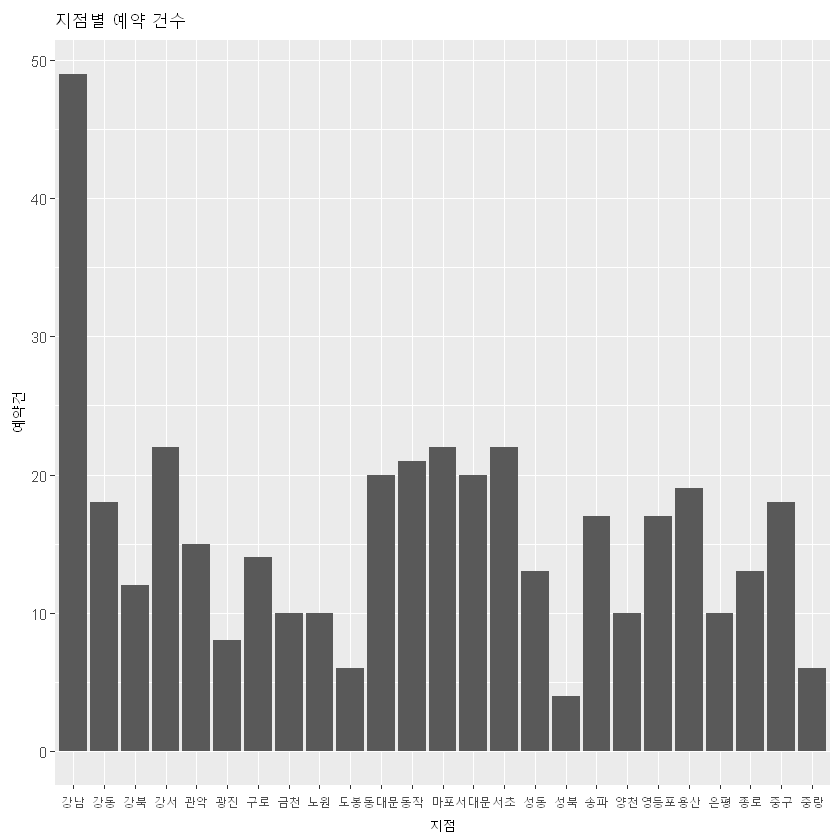

In [63]:
# 지점 예약 건수 히스토그램
gg <- ggplot(data = reservation_r, aes(x = branch)) + geom_bar(stat = "count")+#y축의 높이를 세어 그림.
      labs(title = "지점별 예약 건수", x = "지점", y = "예약건") #x축 y축 이름 바꾸기
gg

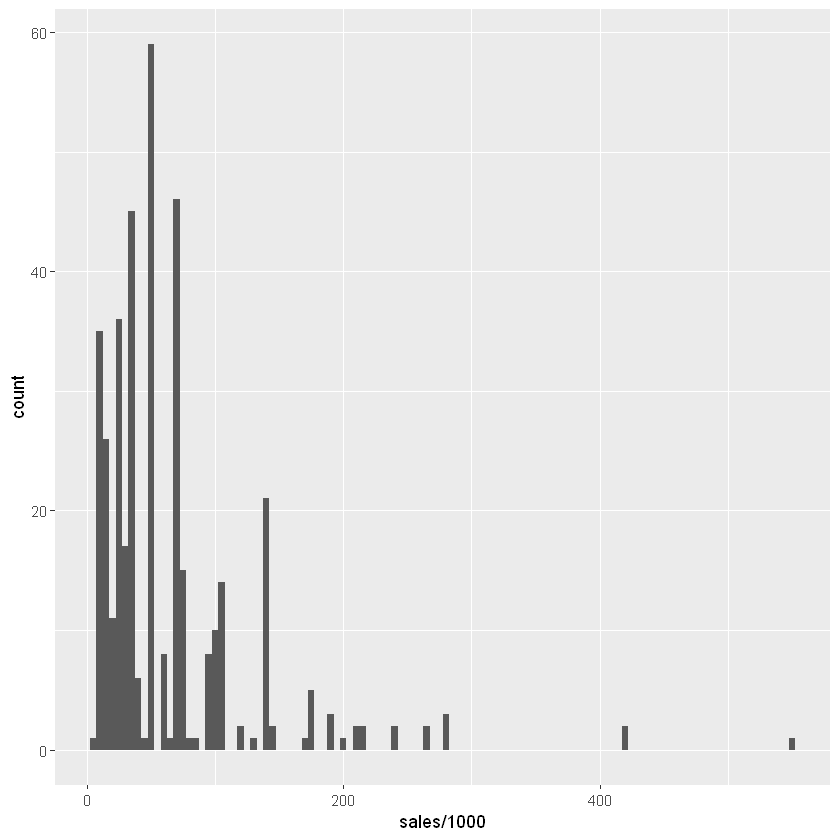

In [65]:
ggplot(data = order_info_r, aes(x =sales/1000))+
geom_histogram(binwidth = 5)

In [66]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>%
    group_by(item_id, product_name) %>%
    summarise(amt_item = sum(sales/1000)) %>%
    select(item_id, amt_item, product_name)

df_pie_graph # 데이터셋 확인

item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


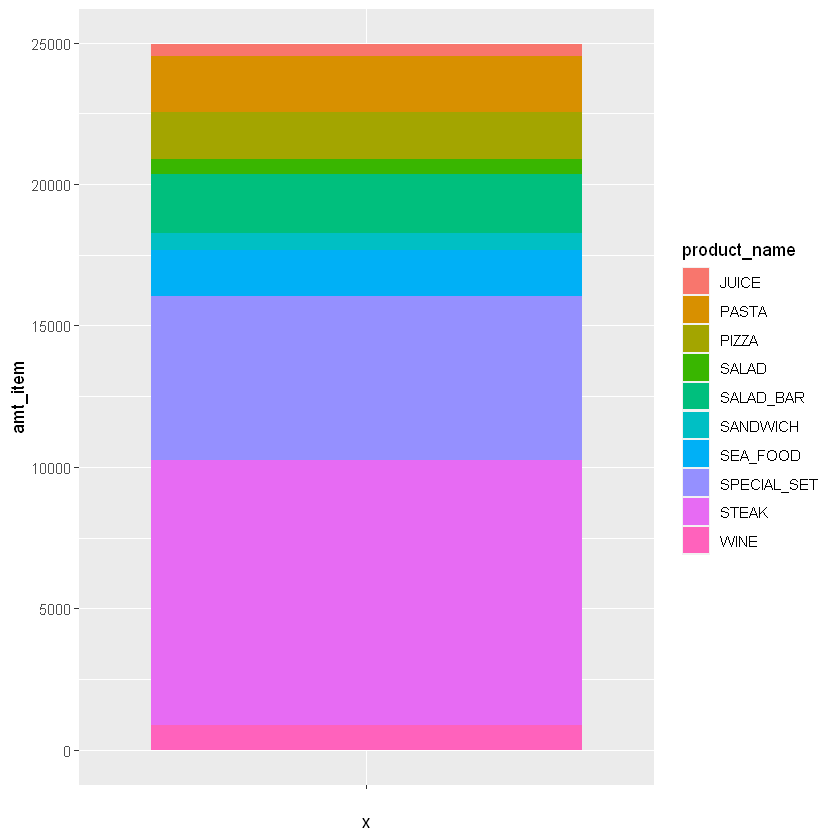

In [67]:
# 누적 막대 그래프로 그리기
ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
    geom_bar(stat = "identity")

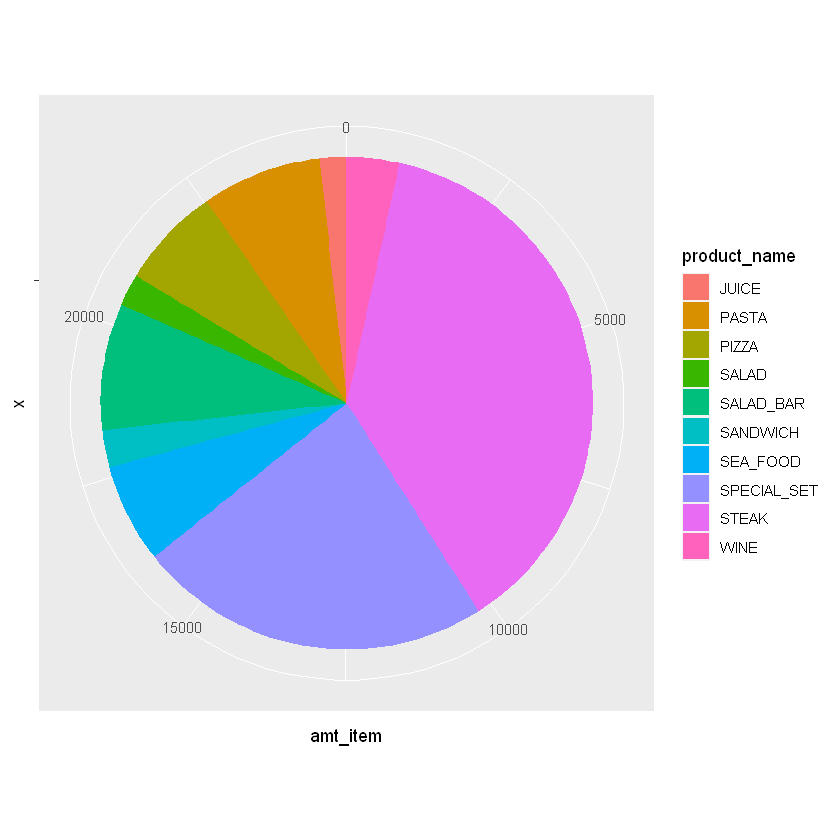

In [79]:
gg <- ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
    geom_bar(stat = "identity") +
    coord_polar("y", start = 0)

gg

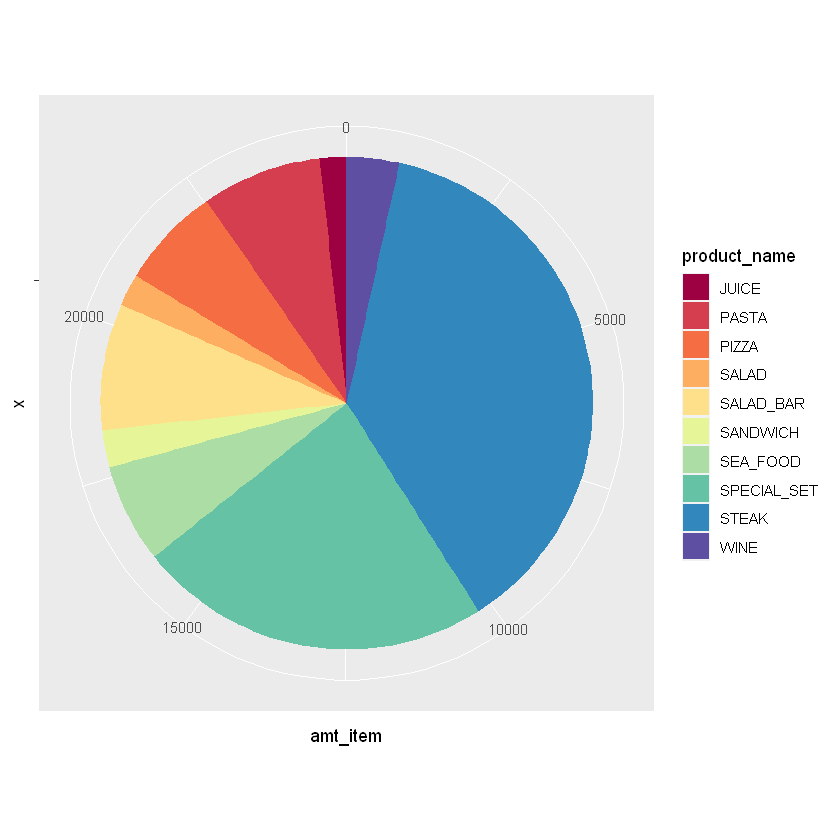

In [80]:
# Spectral 색상 팔레트로 채움, direction = -1을 적용하면 팔레트 순서가 바뀜

gg <- gg + scale_fill_brewer(palette = "Spectral")
gg


Warning message in pal_name(palette, type):
"Unknown palette Apple"Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
"

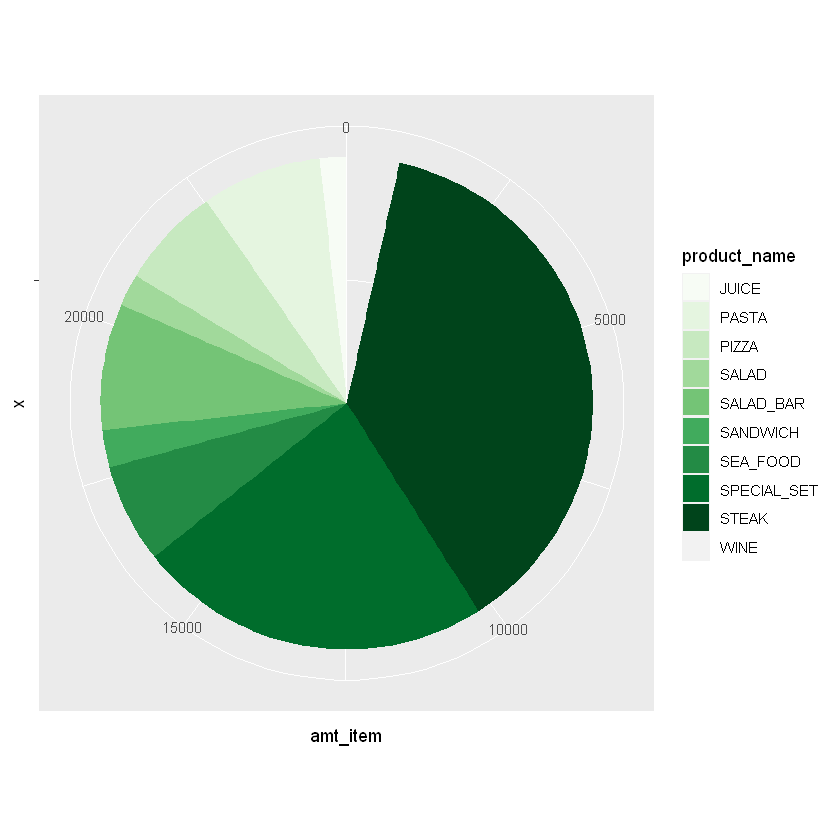

In [81]:
gg <- gg + scale_fill_brewer(palette = 'Apple')
gg